In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Load the dataset

In [2]:
df=pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2.It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file,number of attributes, types of attributes and a general idea of likely challenges in the dataset


In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
# All columns are numerical except the column :name. 

In [7]:
df.isnull().sum() # no missing value observed.

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
# imbalance data as we have more data for positive class compare to negetive class

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### Data Observation:

In [11]:
# total of 23 attributes.. "name" is not required for analysis and shall be dropped
# Features are having different units and scale.. it is to be noted that model get baised toward attribute having 
# dominate units/scaling.so it is important to do scaling so that all features dimension maintain the same scale for modeling

# challanges in data-cleaning
# 1. data scaling is required
# 2. target variable 'status' is of type int64.. this need to be converted into categorical variable for analysis

### 3. Using univariate & bivariate analysis to check the individual attributes for their basic  statistic such as central values, spread, tails etc. What are your observations? 


In [12]:
## Since in the data set we have 23 features so first we do bivariate analysis because univariate will not be managebale this point of time.
## Will drop few features if they have strong relation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21068208>,
      dtype=object)

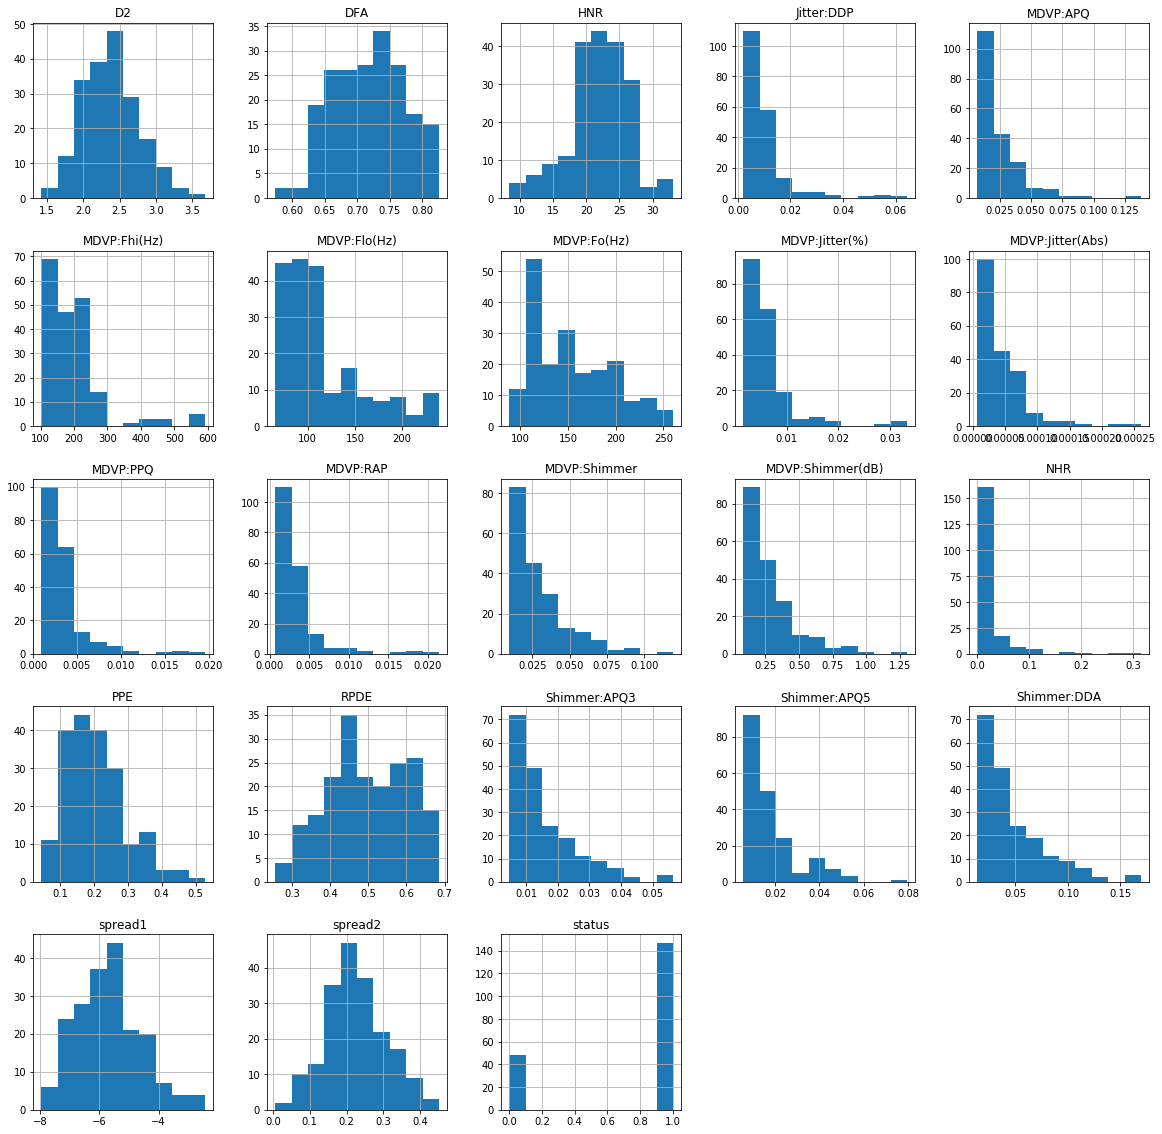

In [13]:
# perform univariant analysis by generating histogram of all dimensions
df.hist(figsize = [20,20])

In [14]:
### Features like - MDVP(fhi,flo,jitter%, jitter abs,RAP,PPQ), Shimmer,NHR are right skewed
### Features like - HNR, RDE,DFA, spread1, spread2,D2,PPE are close to normal distribution

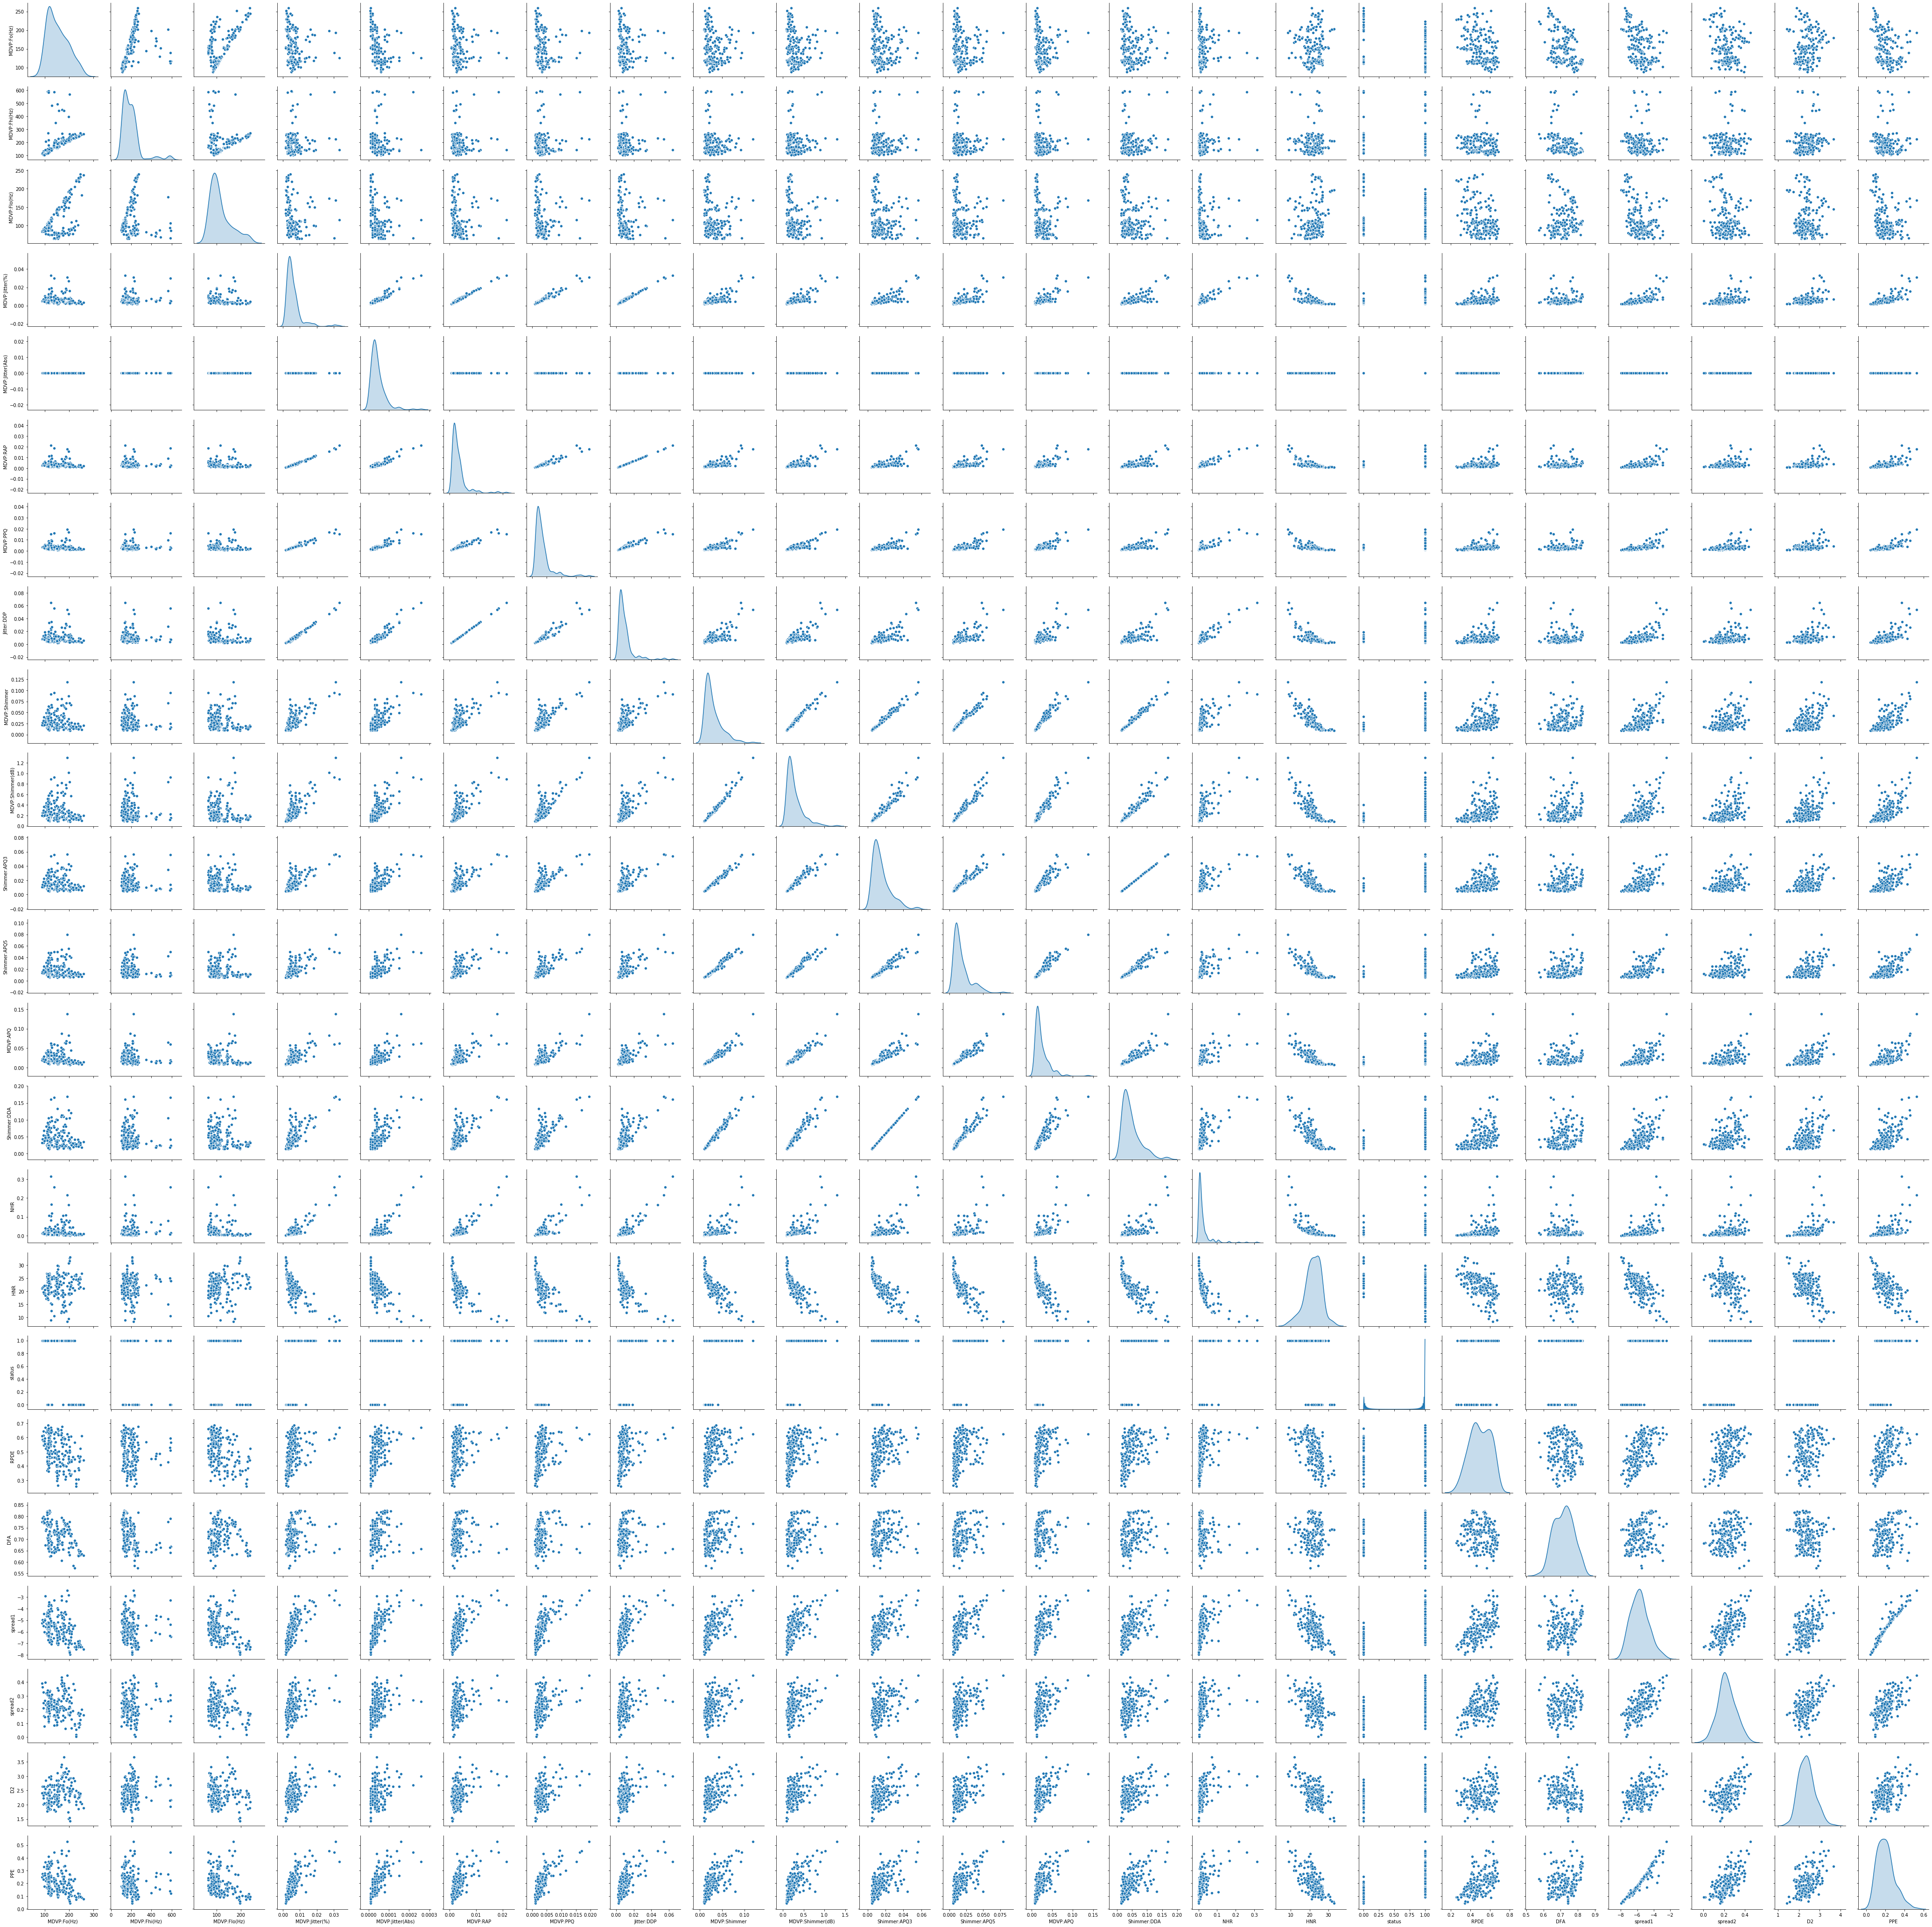

In [15]:
sns.pairplot(df, diag_kind = "kde")

In [22]:
#Attributes with multi gausian distributions: MDVP:Fhi(Hz), MDVP:Flo(Hz), DFA
#Shimmer DDA and Shimmer APQ3 has positive correlation
# MDVP(RAP) and jitter DDP have strong positive relation. And also they both have same relation with other feature too.
# Hence keeping any one during data modeling should be good enough.
# PPE and spread1 have strong positive correlation.

In [23]:
corr=df.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


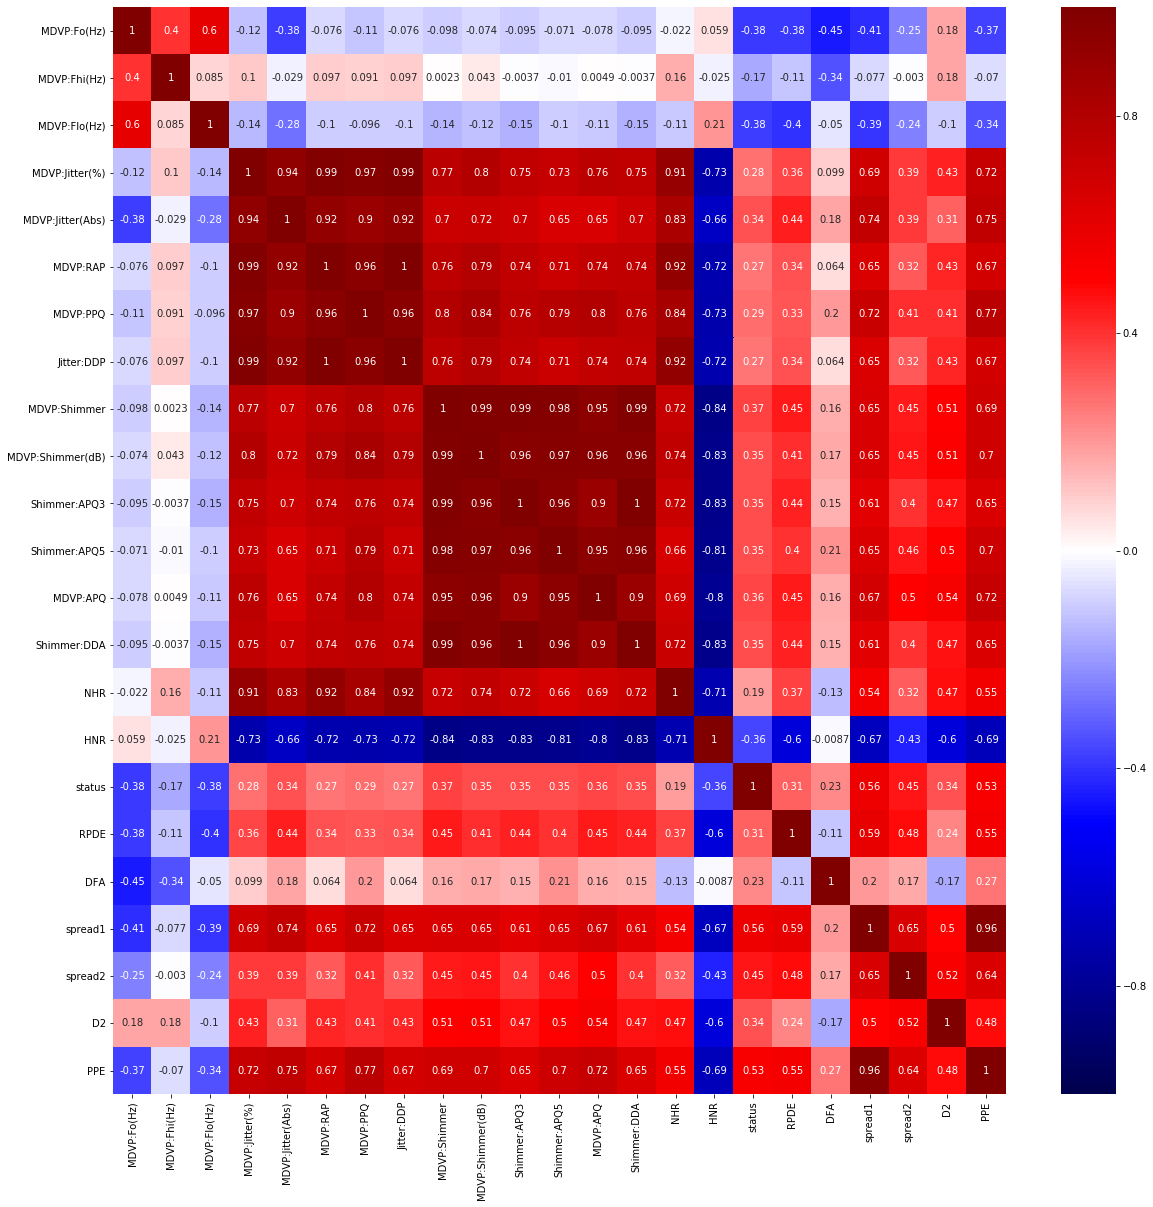

In [24]:

plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='seismic')

### INFERENCE : 

In [25]:

# From above pairplot & correlation matrix, we find that :
# All MDVP group and shimmer group are positive correlated with each other in group
#1. MDVP:Jitter(%) & MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),NHR,MDVP:APQ,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA ,are highly positively corelated. 

#2. HNR. NHR are highly negatively corelated. Thus, NHR are other features mentioned in above point are also highly negatively corelated. 


### Univariate analysis

Since many fields are measures of MDVP,Jitter, so we can keep only 1 for our univariate analsis as they all have strong positive relation among each other . Similarly, there is more than 1 fields to indicate Shimmer, and hence only 1 should be enough


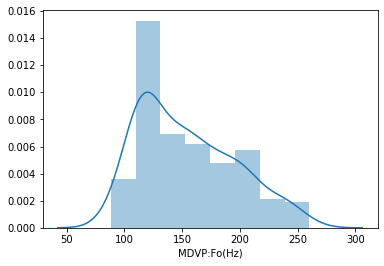

In [27]:
sns.distplot(df['MDVP:Fo(Hz)'])

Data distribution in MDVP: F0(Hz)-avg freq is between 100 to 250, highest being around 125 The data is not normally distributed & is Right skewed.

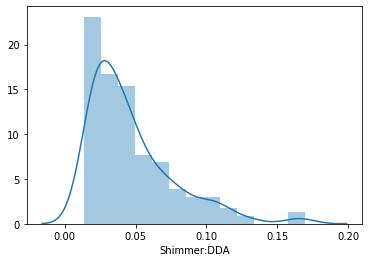

In [28]:
sns.distplot(df['Shimmer:DDA'])

Shimmer DDA has higher frequencies in the range of 0.025 to 0.05 Data is Right skewed.


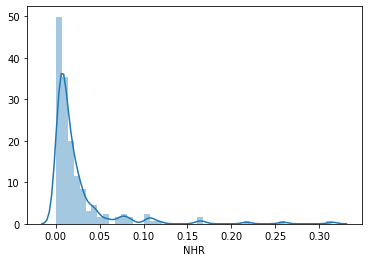

In [29]:
sns.distplot(df.NHR)

NHR has the highest data distribution between 0 to 0.05. Data is Right skewed .


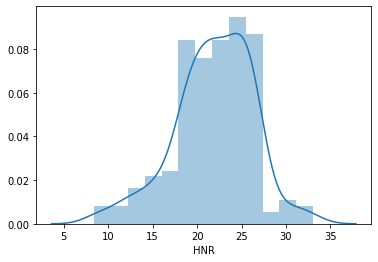

In [30]:
sns.distplot(df.HNR)

HNR has highest data distribution between 18 to 28 Data seems to be slightly left Skewed, also there seem to be outliers

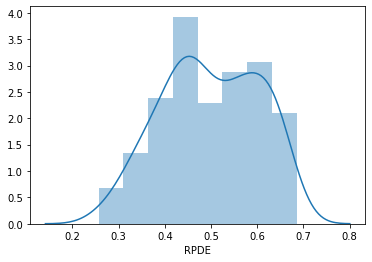

In [31]:
sns.distplot(df.RPDE)

RPDE has most data distribution in the range of 0.4 to 0.7. The highest is seen around 0.45 RPDE looks to be normally distributed

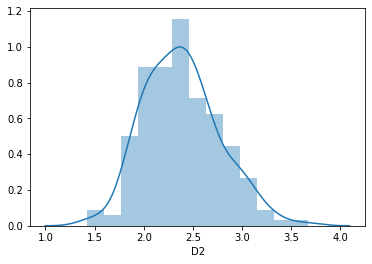

In [32]:
sns.distplot(df.D2)

Most data for D2 lies between 1.75 to 3.5, the peak is observed at 2.5 Data seems to be normally distributed

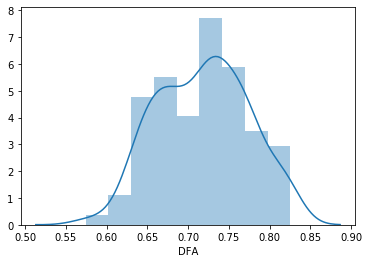

In [33]:
sns.distplot(df.DFA)

Most data for DFA looks to be concentrated between 0.63 to 0.8 Highest points are seenbetween 0.7 to 0.75 Data seems to be normally distributed

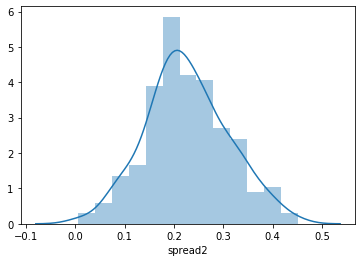

In [34]:
sns.distplot(df.spread2)


Data in Spread2 has higher distributions between the range of 0.1 to 0.35 Peak is observed at 0.2 and the data seems to follow normal distribution

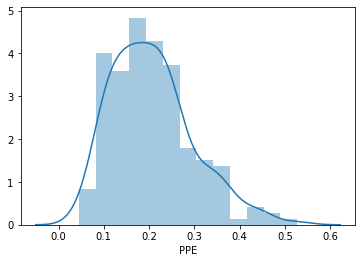

In [35]:
sns.distplot(df.PPE)

Data in PPE has higher frequencies between 0.1 to 0.4 Highest point is at 0.2 and data looks like it is slightly right skewed. There are possibly some outliers towards 0.5 range

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [36]:

#X = df.drop(["status","name","Jitter:DDP"],axis = 1)
X = df.drop(["status","name"],axis = 1)
y = df["status"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [38]:
##Data Standrization
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

### 5. Create the model using “entropy” method of reducing the entropy and fit it to training  data

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy', random_state = 1)
DT.fit(X_train_scaled,y_train)

Dec_score_train = DT.score(X_train_scaled,y_train)
print("Decision tree Accuracy score - train : ", Dec_score_train)
Dec_score_test = DT.score(X_test_scaled,y_test)
print("Decision tree Accuracy score - test:", Dec_score_test)

Decision tree Accuracy score - train :  1.0
Decision tree Accuracy score - test: 0.864406779661017


Decesion Tree accuracy with train data is 100%. It's a perfect example of overfit model ,which perform very well in train data
but not in test data. we can't trust this types of model as  production behaviour is unpredictable.

### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted  values and do a crosstab. 

In [41]:
from sklearn import metrics
# predict the outcome for test data
y_predict = DT.predict(X_test_scaled)

# calculate accuracy score on test data(this is unseen data not used while modeling)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nAccuracy Score on test data: ", acc)


Accuracy Score on test data:  0.864406779661017


In [42]:
print("Decision tree test Confusion Matrix - test\n", metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

pd.crosstab(y_test, y_predict,margins = True) 

Decision tree test Confusion Matrix - test
 [[12  7]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



col_0,0,1,All
status,,,
0,12,7,19
1,1,39,40
All,13,46,59


### Inference :

1. This model is able to predict PD positive patients as PD positive patients at a recall rate of 97%.
2. This model is performing poorly at prediction PD negative patients as PD negative with a recall rate of 63%, which is as expected based on the data imbalance that we saw in the dataset.


In [43]:

pd.Series(DT.feature_importances_, X_train.columns).sort_values(ascending = False)

PPE                 0.387263
MDVP:Fo(Hz)         0.219150
Shimmer:DDA         0.106000
MDVP:Fhi(Hz)        0.099800
D2                  0.079409
DFA                 0.067644
Jitter:DDP          0.040734
spread2             0.000000
MDVP:Flo(Hz)        0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.000000
MDVP:Shimmer(dB)    0.000000
MDVP:Shimmer        0.000000
spread1             0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
NHR                 0.000000
HNR                 0.000000
RPDE                0.000000
Shimmer:APQ3        0.000000
dtype: float64

Understanding feature importance for the built decision tree : 
 PPE feature has the highest importance. Followed by MDVP:Fo(Hz) , Shimmer:DDA


### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.  What is the impact on the model accuracy? How does regularization help? 

As we saw above  model is overfit. Now we will be performing regularization and will see prediction with training and test data

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy',random_state = 1, max_depth=6,min_samples_leaf=4,min_impurity_decrease=0.25)
dt_model_reg.fit(X_train_scaled, y_train)


DecReg_score_train = dt_model_reg.score(X_train_scaled,y_train)
print("Decision tree Accuracy score - train : ", DecReg_score_train)
DecReg_score_test = dt_model_reg.score(X_test_scaled,y_test)
print("Decision tree Accuracy score - test", DecReg_score_test)

y_pred=dt_model_reg.predict(X_test_scaled)
print('Model Accuracy:', metrics.accuracy_score(y_test, y_pred),'%')
print(metrics.classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred,margins = True) 

Decision tree Accuracy score - train :  0.8897058823529411
Decision tree Accuracy score - test 0.8135593220338984
Model Accuracy: 0.8135593220338984 %
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.84      0.90      0.87        40

    accuracy                           0.81        59
   macro avg       0.79      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



col_0,0,1,All
status,,,
0,12,7,19
1,4,36,40
All,16,43,59


 By regularizing Decesion tree growth, We see that training accuracy has come down to 89%. However, test accuracy 
 also came down to 81%. Regularization helps in reducing overfitting, which we see in below result. with limited training, it is failrly generalising on test data. 


### 8.Next implement the decision tree using Random Forest and find the accuracy 

In [45]:
from sklearn.ensemble import RandomForestClassifier
#building a random forest classifier using number of tree parameter
RFmodel = RandomForestClassifier(n_estimators=12, random_state = 1)
RFmodel.fit(X_train_scaled,y_train)

Y2_pred = RFmodel.predict(X_test_scaled) 
print('Model Accuracy:', metrics.accuracy_score(y_test, Y2_pred),'%')
print("RF model Confusion Matrix - test\n",metrics.confusion_matrix(y_test,Y2_pred))  
print(metrics.classification_report(y_test, Y2_pred))

Model Accuracy: 0.9152542372881356 %
RF model Confusion Matrix - test
 [[14  5]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.89      1.00      0.94        40

    accuracy                           0.92        59
   macro avg       0.94      0.87      0.89        59
weighted avg       0.92      0.92      0.91        59



## Randome forest is performing better than decison tree.